## Analise sobre a Base de Dados

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
# disable chained assignments
pd.options.mode.chained_assignment = None 

In [188]:
df_base = pd.read_json("assets/olx.json", orient="records", convert_dates=False)
df_base.head(3)

df2 = pd.DataFrame(df_base.caracteristicas.apply(pd.Series))
df = pd.concat([df_base, df2], axis=1)

campos_numericos = ['preco', 'area_util', 'banheiros', 'quartos', 'vagas_na_garagem']
campos_categoricos = ['bairro']

for campo in campos_numericos:
    df[campo] = df[campo].apply(str).apply(lambda x: re.sub('[^0-9]', '', x))
    df[campo] = df[campo].apply(lambda x: 0 if x == '' else x).astype(float)
    df[campo] = df[campo].astype(float)
    
df['preco'] = df['preco'].apply(lambda x: x*1000 if x < 1000 else x)
df['preco'] = df['preco'].apply(lambda x: x/1000 if x > 50000000 else x)

df = df[campos_numericos + campos_categoricos]
df.head(3)

,preco,area_util,banheiros,quartos,vagas_na_garagem,bairro
0,138900.0,40.0,0.0,0.0,0.0,Santa Maria
1,330000.0,0.0,2.0,3.0,1.0,Jardins
2,330000.0,0.0,2.0,3.0,1.0,Jardins


## Preenchendo valores vazios

In [189]:
df = df.replace(to_replace=0.0, value=df.median(), method='ffill')
df.head(3)

,preco,area_util,banheiros,quartos,vagas_na_garagem,bairro
0,138900.0,40.0,2.0,3.0,1.0,Santa Maria
1,330000.0,62.0,2.0,3.0,1.0,Jardins
2,330000.0,62.0,2.0,3.0,1.0,Jardins


In [207]:
def plot_grafico(df, x, y, xlabel, ylabel):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    sns.barplot(x=x, y=y, data=df).set(xlabel=xlabel, ylabel=ylabel)

    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()

## Correlação entre caracteristicas e preço

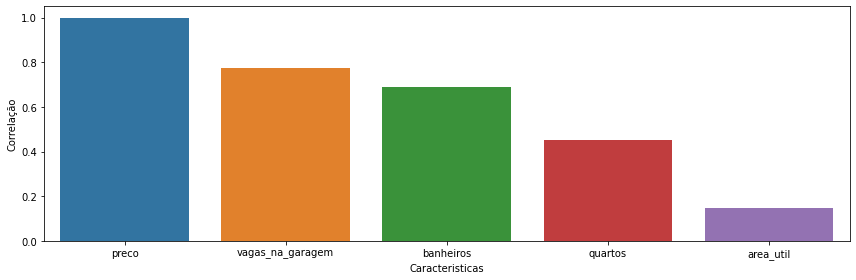

In [208]:
df_h1 = pd.DataFrame(df.corr().abs()['preco']).sort_values(by='preco', ascending=False)
df_h1['campo'] = df_h1.index

plot_grafico(df_h1, "campo", "preco", 'Caracteristicas', 'Correlação')

## Correlação entre caracteristicas no mesmo bairro

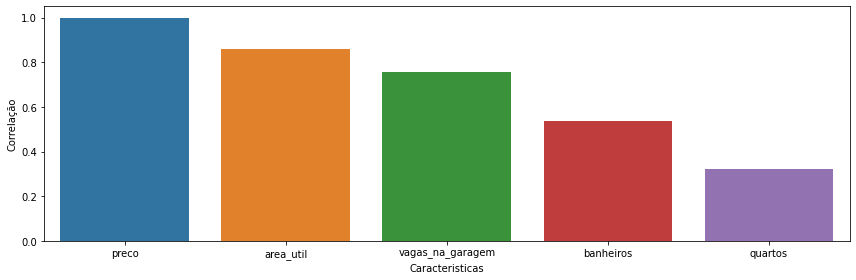

In [209]:
df_h2 = pd.DataFrame(df[df['bairro'] == 'Atalaia'].corr()['preco']).sort_values(by='preco', ascending=False)
df_h2['campo'] = df_h2.index

plot_grafico(df_h2, "campo", "preco", 'Caracteristicas', 'Correlação')

## Correlação entre caracteristicas no mesmo Jardins

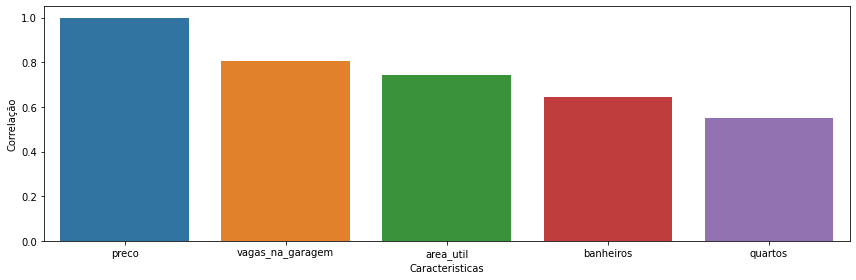

In [219]:
df_h2 = pd.DataFrame(df[df['bairro'] == 'Jardins'].corr()['preco']).sort_values(by='preco', ascending=False)
df_h2['campo'] = df_h2.index

plot_grafico(df_h2, "campo", "preco", 'Caracteristicas', 'Correlação')

## Preço médio por bairro 

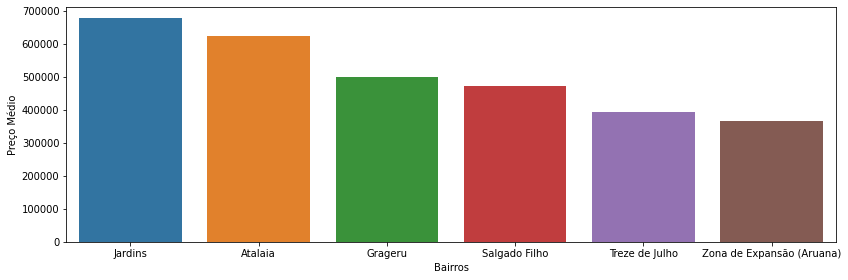

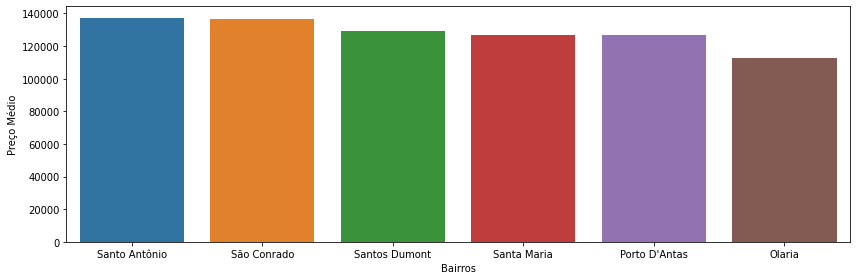

In [210]:
df_aux = pd.DataFrame(df.groupby('bairro')['preco'].count())
df_aux['bairro'] = df_aux.index
df_aux['anuncios'] = df_aux['preco']

bairros_validos = df_aux[df_aux['anuncios'] > 10]

df_h3 = pd.DataFrame(df[df['bairro'].isin(list(bairros_validos.index))].groupby('bairro')['preco'].mean()).sort_values(by='preco', ascending=False)
df_h3['bairro'] = df_h3.index

plot_grafico(df_h3.iloc[0:6], "bairro", "preco", 'Bairros', 'Preço Médio')
plot_grafico(df_h3.iloc[-6:], "bairro", "preco", 'Bairros', 'Preço Médio')

## Anúncios por bairro

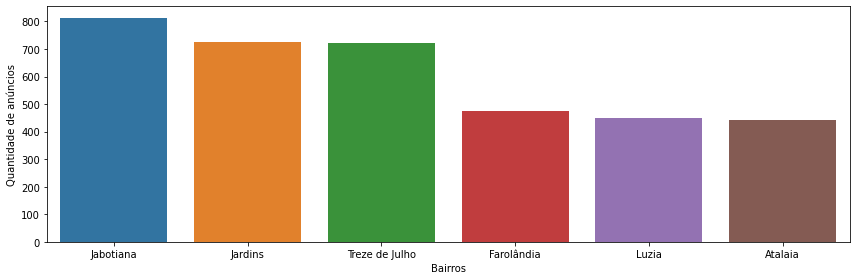

In [199]:
df_h4 = pd.DataFrame(df.groupby('bairro')['preco'].count()).sort_values(by='preco', ascending=False)
df_h4['bairro'] = df_h4.index
df_h4['anuncios'] = df_h4['preco']

plot_grafico(df_h4.iloc[0:6], "bairro", "anuncios", 'Bairros', 'Quantidade de anúncios')

## Area por bairro

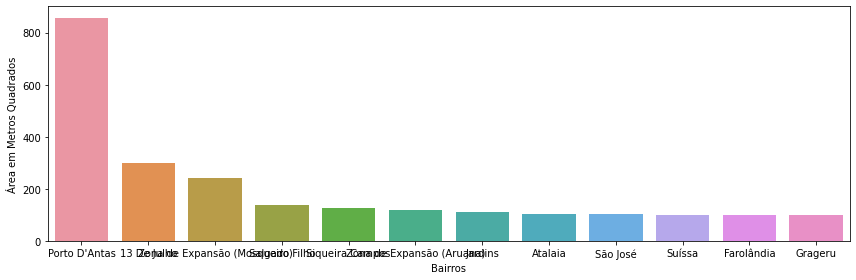

In [223]:
df_h4 = pd.DataFrame(df.groupby('bairro')['area_util'].mean()).sort_values(by='area_util', ascending=False)
df_h4['bairro'] = df_h4.index

plot_grafico(df_h4.iloc[0:12], "bairro", "area_util", 'Bairros', 'Área em Metros Quadrados')

In [225]:
df[df['bairro'] == "Porto D'Antas"]

,preco,area_util,banheiros,quartos,vagas_na_garagem,bairro
1853,110000.0,55.0,1.0,2.0,1.0,Porto D'Antas
2170,122000.0,48.0,1.0,2.0,1.0,Porto D'Antas
2192,120000.0,60.0,1.0,2.0,1.0,Porto D'Antas
2796,125000.0,43.0,1.0,2.0,1.0,Porto D'Antas
2921,270000.0,62.0,1.0,2.0,1.0,Porto D'Antas
3019,135000.0,62.0,1.0,2.0,1.0,Porto D'Antas
3021,122000.0,48.0,1.0,2.0,1.0,Porto D'Antas
3213,120000.0,55.0,1.0,2.0,1.0,Porto D'Antas
3420,100009.0,56.0,1.0,2.0,1.0,Porto D'Antas
3798,120000.0,51.0,1.0,2.0,1.0,Porto D'Antas


In [64]:
data = [426188.0774853378, 1.01, 2.4075853018372704,
5008329.82160321, 0.1, 1.280951443569554,
2586190.72130947, 0.22, 1.8679461942257218]

for i, err in enumerate(data):
    if i%3 == 0:
        data[i] = [err, 'rmse']
    if i%3 == 1:
        data[i] = [err, 'median']
    if i%3 == 2:
        data[i] = [err, 'mean']
        
    if i < 3:
        data[i] = data[i] + ['RL']
    if i < 6 and i >= 3:
        data[i] = data[i] + ['RFA']
    if i < 9 and i >= 6:
        data[i] = data[i] + ['LGBM']
        
data

[[426188.0774853378, 'rmse', 'RL'],
 [1.01, 'median', 'RL'],
 [2.4075853018372704, 'mean', 'RL'],
 [5008329.82160321, 'rmse', 'RFA'],
 [0.1, 'median', 'RFA'],
 [1.280951443569554, 'mean', 'RFA'],
 [2586190.72130947, 'rmse', 'LGBM'],
 [0.22, 'median', 'LGBM'],
 [1.8679461942257218, 'mean', 'LGBM']]

In [28]:
df = pd.DataFrame(np.array(data),columns=['error', 'method', 'model'])
df.error = df.error.astype(float)


sns.catplot(x='model', y="error", hue="method", kind="bar", data=df)

NameError: name 'data' is not defined

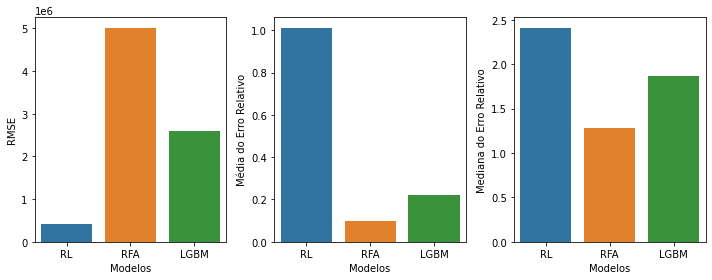

In [72]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

g = sns.barplot(x='model',
                 y='error',
                 data=df[df['method'] == 'rmse'],
                 ax=axes[0])
# g.axes.set_ylim(0,25)
g.set(xlabel='Modelos', ylabel='RMSE')

g = sns.barplot(x='model',
                 y='error',
                 data=df[df['method'] == 'median'],
                 ax=axes[1])
g.set(xlabel='Modelos', ylabel='Média do Erro Relativo')

g = sns.barplot(x='model',
                 y='error',
                 data=df[df['method'] == 'mean'],
                 ax=axes[2])
g.set(xlabel='Modelos', ylabel='Mediana do Erro Relativo')

# g = sns.FacetGrid(df, col="method", height=4, aspect=.8)
# g.map(sns.barplot, "model", "error", order=["model_1", "model_2", "model_3"])

plt.tight_layout()
plt.show()